# WeatherPy
----
Observable Trends
1. The closer to the equator, the more elevated the temperature levels.
2. The latitude and temperature correlation for the hemispheres are the opposite. Northern Hemisphere reflects moderate negative correlation vs the Southern Hemisphere reflects moderate positve correlation.
3. There is no correlation between latitude and cloudiness for both hemispheres.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set up info each city to call
city_name = []
country_name = []
temp = []
cloudiness = []
humidity = []
lat = []
lng = []
wind_speed = []
date = []

index_counter = 0
set_counter = 1

# For each city name in cities, perform a request for data on each
for city in cities:
    try:   
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country_name.append(response["sys"]["country"])
        temp.append(response['main']['temp_max'])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
            
        print(f"Print Record {index_counter} of Set {set_counter} : {city}")
        
    except:
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Print Record 1 of Set 1 : ushuaia
Print Record 2 of Set 1 : bethel
Print Record 3 of Set 1 : georgetown
Print Record 4 of Set 1 : hermanus
Print Record 5 of Set 1 : albany
Print Record 6 of Set 1 : barranca
Print Record 7 of Set 1 : barrow
Print Record 8 of Set 1 : chuy
Print Record 9 of Set 1 : mataura
Print Record 10 of Set 1 : rundu
Print Record 11 of Set 1 : jamestown
Print Record 12 of Set 1 : saint george
Print Record 13 of Set 1 : cherskiy
Print Record 14 of Set 1 : new norfolk
Print Record 15 of Set 1 : labuhan
Print Record 16 of Set 1 : dembi dolo
Print Record 17 of Set 1 : yellowknife
Print Record 18 of Set 1 : zhigansk
Print Record 19 of Set 1 : fort wellington
Print Record 20 of Set 1 : constitucion
Print Record 21 of Set 1 : bengkulu
Print Record 22 of Set 1 : castro
Print Record 23 of Set 1 : bluff
Print Record 24 of Set 1 : busselton
Print Record 25 of Set 1 : hofn
City not found. Skipping...
Print Record 26 of Set 1 : gat
Print Record 27 of Set 1 : esperance
City not fo

Print Record 10 of Set 5 : portland
City not found. Skipping...
Print Record 11 of Set 5 : tura
Print Record 12 of Set 5 : bol
Print Record 13 of Set 5 : camacupa
Print Record 14 of Set 5 : samana
Print Record 15 of Set 5 : porosozero
Print Record 16 of Set 5 : kruisfontein
City not found. Skipping...
Print Record 17 of Set 5 : port elizabeth
Print Record 18 of Set 5 : pangnirtung
Print Record 19 of Set 5 : adwa
Print Record 20 of Set 5 : les cayes
Print Record 21 of Set 5 : sharjah
Print Record 22 of Set 5 : mednogorsk
City not found. Skipping...
Print Record 23 of Set 5 : camabatela
Print Record 24 of Set 5 : numaligarh
Print Record 25 of Set 5 : katsuura
Print Record 26 of Set 5 : aguimes
Print Record 27 of Set 5 : munirabad
Print Record 28 of Set 5 : nago
Print Record 29 of Set 5 : amazar
Print Record 30 of Set 5 : hvolsvollur
Print Record 31 of Set 5 : kwinana
City not found. Skipping...
Print Record 32 of Set 5 : ostrovnoy
Print Record 33 of Set 5 : natuba
Print Record 34 of Set 

Print Record 18 of Set 9 : tenenkou
Print Record 19 of Set 9 : cavalcante
Print Record 20 of Set 9 : uige
Print Record 21 of Set 9 : chara
Print Record 22 of Set 9 : beyneu
Print Record 23 of Set 9 : tena
City not found. Skipping...
Print Record 24 of Set 9 : hervey bay
Print Record 25 of Set 9 : marsala
Print Record 26 of Set 9 : chililabombwe
Print Record 27 of Set 9 : aksarka
Print Record 28 of Set 9 : fonte boa
Print Record 29 of Set 9 : silopi
Print Record 30 of Set 9 : ulladulla
City not found. Skipping...
Print Record 31 of Set 9 : nishihara
Print Record 32 of Set 9 : broken hill
Print Record 33 of Set 9 : punta alta
Print Record 34 of Set 9 : marsa matruh
Print Record 35 of Set 9 : sarti
Print Record 36 of Set 9 : goderich
Print Record 37 of Set 9 : kampot
Print Record 38 of Set 9 : bonthe
Print Record 39 of Set 9 : kaniama
City not found. Skipping...
Print Record 40 of Set 9 : eenhana
Print Record 41 of Set 9 : longyearbyen
City not found. Skipping...
City not found. Skipping.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_weather_data = pd.DataFrame({"City": city_name,
                        "Temperature": temp,
                        "Country": country_name,
                        "Temperature": temp,
                        "Cloudiness": cloudiness,
                        "Humidity": humidity,
                        "Latitude": lat,
                        "Longitude": lng,                                      
                        "Wind Speed": wind_speed,
                        "Date": date})

city_weather_data.head()

,City,Temperature,Country,Cloudiness,Humidity,Latitude,Longitude,Wind Speed,Date
0,Ushuaia,2.00,AR,20,80,-54.80,-68.30,9.80,1593223349
1,Bethel,21.11,US,1,64,41.37,-73.41,1.50,1593223349
2,George Town,29.00,MY,20,88,5.41,100.34,1.50,1593223349
3,Hermanus,12.22,ZA,43,87,-34.42,19.23,7.15,1593223349
4,Albany,22.22,US,0,84,42.60,-73.97,1.75,1593223151


## Inspect the data and remove the cities where the humidity > 100%.
There are no cities that have humidity > 100%.

In [5]:
# Humidity check > 100%
humidity_check = city_weather_data.Humidity
values = humidity_check >100
values.head()

0    False
1    False
2    False
3    False
4    False
Name: Humidity, dtype: bool

In [6]:
# Export the City_Data into a csv
city_weather_data.to_csv("output_data/cities.csv", index = False)

In [7]:
#Date conversion
date =datetime.datetime.fromtimestamp(
        int(city_weather_data['Date'][0])
    ).strftime('%m/%d/%Y')
date

'06/26/2020'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

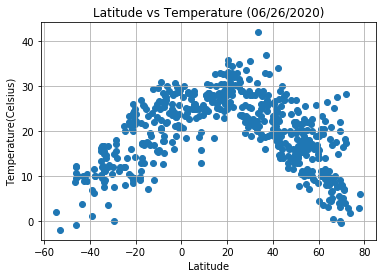

In [8]:
plt.scatter(city_weather_data["Latitude"], city_weather_data["Temperature"], marker="o")
plt.title ("Latitude vs Temperature ({})".format(date))
plt.ylabel("Temperature(Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/Latitude vs Temperature")

#### The highest temperature, ~45 celsius, is found at 40 latitude.

## Latitude vs. Humidity Plot

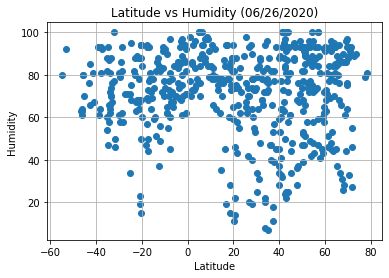

In [9]:
plt.scatter(city_weather_data["Latitude"], city_weather_data["Humidity"], marker="o")
plt.title ("Latitude vs Humidity ({})".format(date))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Images/Latitude vs Humidity")

Humidity is more distributed towards the Northern Hemisphere.

## Latitude vs. Cloudiness Plot

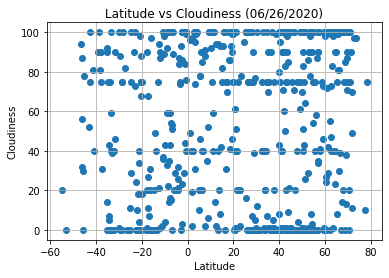

In [10]:
plt.scatter(city_weather_data["Latitude"], city_weather_data["Cloudiness"], marker="o")
plt.title ("Latitude vs Cloudiness ({})".format(date))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Images/Latitude vs Cloudiness")

Cloudiness is evenly distributed across the latitude.

## Latitude vs. Wind Speed Plot

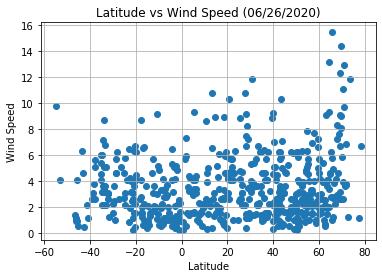

In [11]:
plt.scatter(city_weather_data["Latitude"], city_weather_data["Wind Speed"], marker="o")
plt.title ("Latitude vs Wind Speed ({})".format(date))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Images/Latitude vs Wind Speed")

Wind speed is primarily concentrated between 0-8 mph across the latitude.

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
# Northern Hemisphere, Lat>0
northern_hem = city_weather_data.loc[city_weather_data["Latitude"]>0]
northern_hem.head() 

,City,Temperature,Country,Cloudiness,Humidity,Latitude,Longitude,Wind Speed,Date
1,Bethel,21.11,US,1,64,41.37,-73.41,1.50,1593223349
2,George Town,29.00,MY,20,88,5.41,100.34,1.50,1593223349
4,Albany,22.22,US,0,84,42.60,-73.97,1.75,1593223151
6,Barrow,4.00,US,90,93,71.29,-156.79,3.60,1593223349
10,Jamestown,19.00,US,1,63,42.10,-79.24,2.10,1593223350


In [13]:
# Southern Hemisphere, Lat<0
southern_hem = city_weather_data.loc[city_weather_data["Latitude"]<0]
southern_hem.head()

,City,Temperature,Country,Cloudiness,Humidity,Latitude,Longitude,Wind Speed,Date
0,Ushuaia,2.00,AR,20,80,-54.80,-68.30,9.80,1593223349
3,Hermanus,12.22,ZA,43,87,-34.42,19.23,7.15,1593223349
5,Barranca,15.57,PE,36,91,-10.75,-77.77,2.98,1593223274
7,Chui,7.51,UY,100,70,-33.70,-53.46,3.12,1593223125
8,Mataura,9.58,NZ,56,64,-46.19,168.86,1.11,1593223349


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


Value of R = 0.499


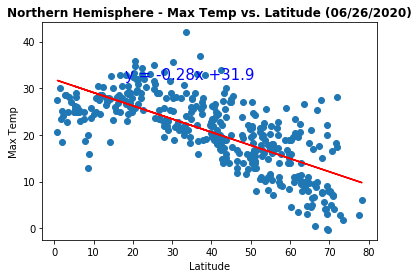

In [14]:
#Set X, y values
x_values = northern_hem["Latitude"]
y_values = northern_hem["Temperature"]

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope*x_values + intercept
lineeq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")

# Set a Title and labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude ({})".format(date), color="black", fontweight="bold") 
plt.annotate(lineeq,(18,32), fontsize=15, color="b")

#Print
print(f'Value of R = {round(rvalue*rvalue,3)}')

#Save the figure
plt.savefig("Images/North Hemisphere - Max_Temperature vs Latitude")

There is moderate negative correlation between temperature and latitude for the northern hemisphere.

Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Value of R = 0.556


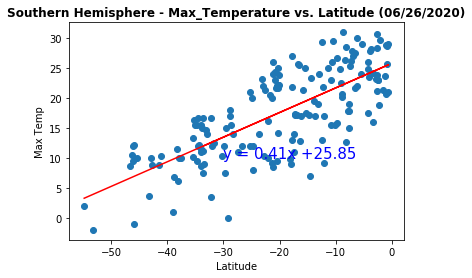

In [15]:
#Set X, y values
x_values = southern_hem["Latitude"]
y_values = southern_hem["Temperature"]

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope*x_values + intercept
lineeq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")

# Set a Title and labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max_Temperature vs. Latitude ({})".format(date), color="black", fontweight="bold") 
plt.annotate(lineeq,(-30,10), fontsize=15, color="b")

#Print
print(f'Value of R = {round(rvalue*rvalue,3)}')

#Save the figure
plt.savefig("Images/Southern Hemisphere - Max_Temperature vs Latitude")

There is moderate positive correlation between temperature and latitude for the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Value of R = 0.001


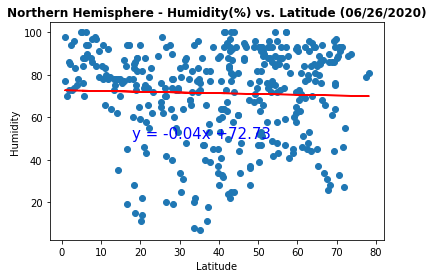

In [16]:
#Set X, y values
x_values = northern_hem["Latitude"]
y_values = northern_hem["Humidity"]

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope*x_values + intercept
lineeq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")

# Set a Title and labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude ({})".format(date), color="black", fontweight="bold") 
plt.annotate(lineeq,(18,50), fontsize=15, color="b")

#Print
print(f'Value of R = {round(rvalue*rvalue,3)}')

#Save the figure
plt.savefig("Images/North Hemisphere - Humidity (%) vs Latitude")

There is no correlation between humidity and latitude for the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Value of R = 0.006


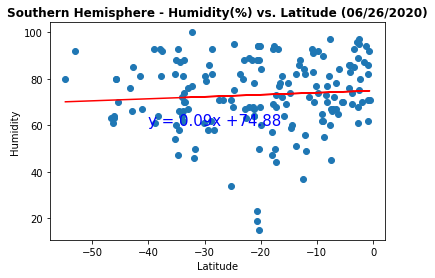

In [17]:
#Set X, y values
x_values = southern_hem["Latitude"]
y_values = southern_hem["Humidity"]

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope*x_values + intercept
lineeq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")

# Set a Title and labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude ({})".format(date), color="black", fontweight="bold") 
plt.annotate(lineeq,(-40,60), fontsize=15, color="b")

#Print
print(f'Value of R = {round(rvalue*rvalue,3)}')

#Save the figure
plt.savefig("Images/South Hemisphere - Humidity (%) vs Latitude")

There is no correlation between humidity and latitude for the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Value of R = 0.0


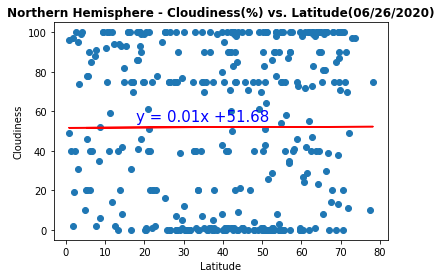

In [18]:
#Set X, y values
x_values = northern_hem["Latitude"]
y_values = northern_hem["Cloudiness"]

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope*x_values + intercept
lineeq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")

# Set a Title and labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude({})".format(date), color="black", fontweight="bold") 
plt.annotate(lineeq,(18,55), fontsize=15, color="b")

#Print
print(f'Value of R = {round(rvalue*rvalue,3)}')

#Save the figure
plt.savefig("Images/North Hemisphere - Cloudiness (%) vs Latitude")

There is no correlation between cloudiness and latitude for the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Value of R = 0.007


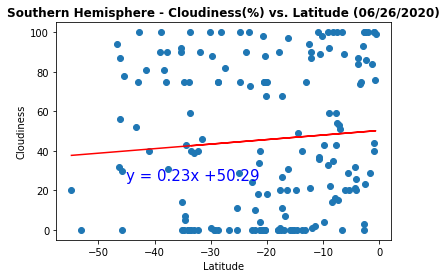

In [19]:
#Set X, y values
x_values = southern_hem["Latitude"]
y_values = southern_hem["Cloudiness"]

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope*x_values + intercept
lineeq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")

# Set a Title and labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude ({})".format(date), color="black", fontweight="bold") 
plt.annotate(lineeq,(-45,25), fontsize=15, color="b")

#Print
print(f'Value of R = {round(rvalue*rvalue,3)}')

#Save the figure
plt.savefig("Images/South Hemisphere - Cloudiness (%) vs Latitude")

There is no negative correlation between cloudiness and latitude for the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Value of R = 0.019


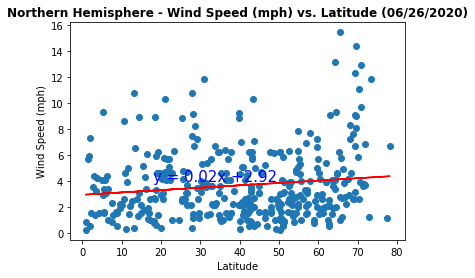

In [20]:
#Set X, y values
x_values = northern_hem["Latitude"]
y_values = northern_hem["Wind Speed"]

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope*x_values + intercept
lineeq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")

# Set a Title and labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude ({})".format(date), color="black", fontweight="bold") 
plt.annotate(lineeq,(18,4), fontsize=15, color="b")

#Print
print(f'Value of R = {round(rvalue*rvalue,3)}')

#Save the figure
plt.savefig("Images/North Hemisphere - Wind Speed (mph) vs Latitude")

There is no correlation between wind speed and latitude for the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Value of R = 0.062


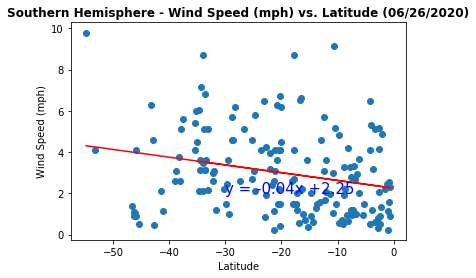

In [21]:
#Set X, y values
x_values = southern_hem["Latitude"]
y_values = southern_hem["Wind Speed"]

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope*x_values + intercept
lineeq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")

# Set a Title and labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude ({})".format(date), color="black", fontweight="bold") 
plt.annotate(lineeq,(-30, 2), fontsize=15, color="b")

#Print
print(f'Value of R = {round(rvalue*rvalue,3)}')

#Save the figure
plt.savefig("Images/South Hemisphere - Wind Speed (mph) vs Latitude")

There is no correlation between wind speed and latitude for the Sourthern Hemisphere.